In [1]:
print('hello world')

hello world


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import scale
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy

%matplotlib inline 
# авто вывод графиков (отпадает необходимость писать plt.show())

In [13]:
time = pd.Timestamp('20130102')
d_1 = {
    'key': pd.Series(['a','b','c','d','e','f'], index = [1,2,3,4,5,6]),
    'time': pd.Series([time, time, time, time, time, time], index = [1,2,3,4,5,6]),
    'x1': pd.Series([23, 67, 56, 58, 44, 22], index = [1,2,3,4,5,6]),
    'x2': pd.Series([1002, 3456, 2356, 6432, 2345, 2324], index = [1,2,3,4,5,6]),
    'x3': pd.Series([1, 1, 0, 1, 1, 0], index = [1,2,3,4,5,6]),
    'x4': pd.Series([23343, 34676, 34322, 23456, 21323, 45468], index = [1,2,3,4,5,6])   
}
df_1 = pd.DataFrame(d_1)
print(df_1)

d_2 = {
    'key': pd.Series(['a','g','c','d','e','f'], index = [1,2,3,4,5,6]),
    'time': pd.Series([time, time, time, time, time, time], index = [1,2,3,4,5,6]),
    'x5': pd.Series([45, 56, 67, 78, 89, 23], index = [1,2,3,4,5,6]),
    'x6': pd.Series([1234, 2344, 2345, 3353, 3532, 2314], index = [1,2,3,4,5,6]),
    'x7': pd.Series([0, 1, 1, 1, 1, 0], index = [1,2,3,4,5,6]),
    'x8': pd.Series([23334, 34334, 34345, 23163, 21879, 45333], index = [1,2,3,4,5,6])   
}
df_2 = pd.DataFrame(d_2)
print(df_2)

data = pd.concat([df_1,df_2], axis=1)
print(data)
data_1 = df_2.append(df_1)
print(data_1)
data_2 = pd.merge(df_1, df_2, how='left', on=['key','time'])
print(data_2)

  key       time  x1    x2  x3     x4
1   a 2013-01-02  23  1002   1  23343
2   b 2013-01-02  67  3456   1  34676
3   c 2013-01-02  56  2356   0  34322
4   d 2013-01-02  58  6432   1  23456
5   e 2013-01-02  44  2345   1  21323
6   f 2013-01-02  22  2324   0  45468
  key       time  x5    x6  x7     x8
1   a 2013-01-02  45  1234   0  23334
2   g 2013-01-02  56  2344   1  34334
3   c 2013-01-02  67  2345   1  34345
4   d 2013-01-02  78  3353   1  23163
5   e 2013-01-02  89  3532   1  21879
6   f 2013-01-02  23  2314   0  45333
  key       time  x1    x2  x3     x4 key       time  x5    x6  x7     x8
1   a 2013-01-02  23  1002   1  23343   a 2013-01-02  45  1234   0  23334
2   b 2013-01-02  67  3456   1  34676   g 2013-01-02  56  2344   1  34334
3   c 2013-01-02  56  2356   0  34322   c 2013-01-02  67  2345   1  34345
4   d 2013-01-02  58  6432   1  23456   d 2013-01-02  78  3353   1  23163
5   e 2013-01-02  44  2345   1  21323   e 2013-01-02  89  3532   1  21879
6   f 2013-01-02  22  23

C:\Programs\Anaconda\Anaconda\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


C:\Programs\Anaconda\Anaconda\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


<Figure size 432x288 with 0 Axes>

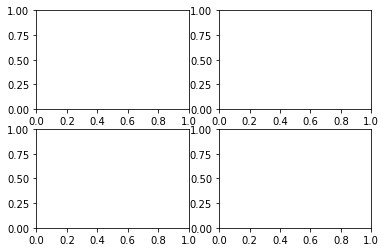

In [3]:
fig = plt.figure()  # an empty figure with no axes
fig.suptitle('No axes on this figure')  # Add a title so we know which it is

fig, ax_lst = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
fig.show()

In [22]:
titanic_df = pd.read_csv(r'C:\Games\Ekonometrika\titanic_is_the_best.csv')
print(titanic_df.head(100))

    PassengerID                                               Name PClass  \
0             1                       Allen, Miss Elisabeth Walton    1st   
1             2                        Allison, Miss Helen Loraine    1st   
2             3                Allison, Mr Hudson Joshua Creighton    1st   
3             4      Allison, Mrs Hudson JC (Bessie Waldo Daniels)    1st   
4             5                      Allison, Master Hudson Trevor    1st   
5             6                                 Anderson, Mr Harry    1st   
6             7                   Andrews, Miss Kornelia Theodosia    1st   
7             8                             Andrews, Mr Thomas, jr    1st   
8             9       Appleton, Mrs Edward Dale (Charlotte Lamson)    1st   
9            10                             Artagaveytia, Mr Ramon    1st   
10           11                          Astor, Colonel John Jacob    1st   
11           12   Astor, Mrs John Jacob (Madeleine Talmadge Force)    1st   

In [50]:
group = pd.DataFrame((titanic_df.groupby(['Age'])['PassengerID'].count()))
#group = titanic_df.groupby(['PClass', 'Survived'])['PassengerID'].count()
print(group)

#group.plot()
#plt.show()
#print(graph)

       PassengerID
Age               
0.17             1
0.33             1
0.80             1
0.83             2
0.92             1
1.00             5
1.50             2
2.00             7
3.00             6
4.00             7
5.00             3
6.00             5
7.00             1
8.00             4
9.00             7
10.00            2
11.00            3
12.00            2
13.00            4
14.00            4
15.00            5
16.00           10
17.00           13
18.00           30
19.00           23
20.00           23
21.00           31
22.00           35
23.00           23
24.00           27
...            ...
40.00           13
41.00            8
42.00           11
43.00            7
44.00            8
45.00           20
46.00            8
47.00            9
48.00           12
49.00           10
50.00           11
51.00            4
52.00            6
53.00            3
54.00            7
55.00            6
56.00            4
57.00            4
58.00            6
59.00       

In [61]:
#x = pd.Series([3,7,23,54])
print(df_1['x4'])
hist, bins = np.histogram(df_1['x4'], bins = 50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-61-29531a553f78>, line 3)